In [3]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics

df = pd.read_csv("Nutrient+Composition+Dataset.csv")
df.dtypes

S.No          int64
Protein     float64
Fat         float64
vitaminC    float64
Fiber       float64
Product      object
dtype: object

In [4]:
df.shape

(1746, 6)

In [5]:
df.head()

,S.No,Protein,Fat,vitaminC,Fiber,Product
0,1,-0.749825,0.426892,0.287212,1.279936,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.230835,-0.304578,-0.881972,-0.387079,Bacon and beef sticks
2,3,-0.060478,0.451551,2.450659,1.729280,"Apples, frozen, unsweetened, unheated (Include..."
3,4,-0.330121,-0.508314,-1.008903,-0.848201,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,-1.259850,-0.560451,-1.255896,-0.548145,"Alcoholic beverage, daiquiri, canned"


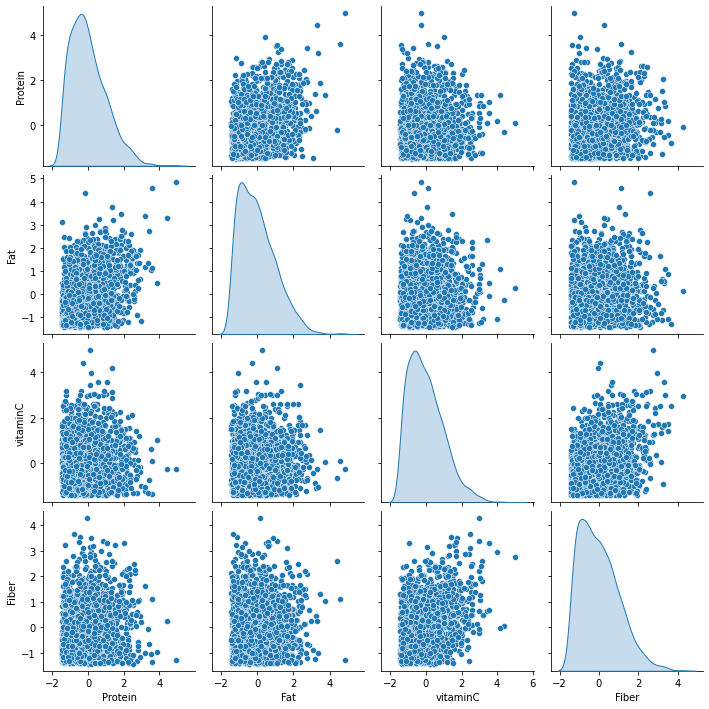

In [28]:
from cProfile import label


df1 = df.copy()
df1.drop(axis=1, columns='Product',inplace=True)
df1Attr = df1.iloc[:,1:]
df1Scaled = df1Attr.apply(zscore)
sns.pairplot(df1Scaled,diag_kind='kde')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

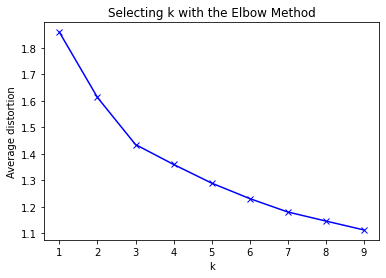

In [29]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df1Scaled)
    prediction=model.predict(df1Scaled)
    meanDistortions.append(sum(np.min(cdist(df1Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df1Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [30]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(df1Scaled)
prediction=final_model.predict(df1Scaled)

#Append the prediction 
df1["GROUP"] = prediction
df1Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df1.head()

Groups Assigned : 



,S.No,Protein,Fat,vitaminC,Fiber,GROUP
0,1,-0.749825,0.426892,0.287212,1.279936,1
1,2,2.230835,-0.304578,-0.881972,-0.387079,0
2,3,-0.060478,0.451551,2.450659,1.729280,1
3,4,-0.330121,-0.508314,-1.008903,-0.848201,2
4,5,-1.259850,-0.560451,-1.255896,-0.548145,2


In [31]:
df1Clust = df1.groupby('GROUP')
df1Clust.mean()

,S.No,Protein,Fat,vitaminC,Fiber
GROUP,,,,,
0,898.714583,1.004071,1.053413,-0.167586,-0.111405
1,862.460497,-0.249208,-0.149572,1.048275,1.031473
2,864.736330,-0.451464,-0.533873,-0.466518,-0.490241
